# metapredict: A deep-learning based predictor of consensus disorder in proteins
##### Last updated Feb 2022


This Jupyter Notebook contains examples to be used for *metapredict*. This notebook was updated for version 2 of metapredict. For more information on metapredict, please see: https://metapredict.readthedocs.io/en/latest/

# Setting up the notebook

In [1]:
# Make graphs show up properly
%matplotlib inline

from metapredict import meta
import os

# flag added in Feb 2022 - if set to True then this notebook matches the original
# published work. If False, uses updated version of metapredict. The LEGACY flag is passed
# to every meta. function, but is NOT actually required; it is included here just so this notebook
# consistently reproduces analyses done previously but can be switched over to the V2 version
LEGACY=True

# Predicting disorder

### Predicting Disorder From a Sequence

In [2]:
# Example sequence is hnRNPA1 UniprotID P09651
hnRNPA1 = 'MSKSESPKEPEQLRKLFIGGLSFETTDESLRSHFEQWGTLTDCVVMRDPNTKRSRGFGFVTYATVEEVDAAMNARPHKVDGRVVEPKRAVSREDSQRPGAHLTVKKIFVGGIKEDTEEHHLRDYFEQYGKIEVIEIMTDRGSGKKRGFAFVTFDDHDSVDKIVIQKYHTVNGHNCEVRKALSKQEMASASSSQRGRSGSGNFGGGRGGGFGGNDNFGRGGNFSGRGGFGGSRGGGGYGGSGDGYNGFGNDGGYGGGGPGYSGGSRGYGSGGQGYGNQGSGYGGSGSYDSYNNGGGGGFGGGSGSNFGGGGSYNDFGNYNNQSSNFGPMKGGNFGGRSSGPYGGGGQYFAKPRNQGGYGGSSSSSSYGSGRRF'

In [7]:
# print predicted disorder for hnRNPA1
print(meta.predict_disorder(hnRNPA1,legacy=LEGACY))

[1, 1, 1, 1, 0.9652, 0.8952, 0.8277, 0.7291, 0.6312, 0.6146, 0.5367, 0.4477, 0.4731, 0.3734, 0.374, 0.3463, 0.2256, 0.169, 0.199, 0.1954, 0.1769, 0.205, 0.1704, 0.2405, 0.2154, 0.2132, 0.2257, 0.2473, 0.2853, 0.24, 0.2277, 0.2557, 0.2689, 0.1874, 0.1848, 0.2051, 0.1486, 0.1359, 0.135, 0.1042, 0.0878, 0.1053, 0.0934, 0.1205, 0.2155, 0.2971, 0.3545, 0.3267, 0.306, 0.2655, 0.2739, 0.2832, 0.2904, 0.3117, 0.3231, 0.3431, 0.253, 0.1989, 0.1303, 0.0425, 0.0103, 0.0284, 0.0331, 0.0212, 0.0628, 0.0915, 0.0847, 0.1197, 0.184, 0.2019, 0.2516, 0.286, 0.3535, 0.3723, 0.3934, 0.4105, 0.3797, 0.4027, 0.3774, 0.4372, 0.4256, 0.4184, 0.3502, 0.3848, 0.4472, 0.4437, 0.4114, 0.446, 0.4535, 0.4822, 0.5617, 0.5629, 0.559, 0.5567, 0.5638, 0.5231, 0.4962, 0.5244, 0.5171, 0.4862, 0.4476, 0.3892, 0.3135, 0.2392, 0.1969, 0.2139, 0.1362, 0.0979, 0.1497, 0.1634, 0.1373, 0.1517, 0.2336, 0.1979, 0.1723, 0.1596, 0.1687, 0.1867, 0.2029, 0.2079, 0.1639, 0.1135, 0.1412, 0.1091, 0.04, 0.0057, 0.0091, 0.0124, 0, 0, 0, 0

NOTE: You do not need to set the sequence to a variable and then predict disorder using that variable. You can directly input the sequence as a String into the meta.predict_disorder() function.

In [14]:
# directly input sequence... note we print only 1st 20 residues for ease of visualization in this notebook
print(meta.predict_disorder('MSKSESPKEPEQLRKLFIGGLSFETTDESLRSHFEQWGTLTDCVVMRDPNTKRSRGFGFVTYATVEEVDAAMNARPHKVDGRVVEPKRAVSREDSQRPGAHLTVKKIFVGGIKEDTEEHHLRDYFEQYGKIEVIEIMTDRGSGKKRGFAFVTFDDHDSVDKIVIQKYHTVNGHNCEVRKALSKQEMASASSSQRGRSGSGNFGGGRGGGFGGNDNFGRGGNFSGRGGFGGSRGGGGYGGSGDGYNGFGNDGGYGGGGPGYSGGSRGYGSGGQGYGNQGSGYGGSGSYDSYNNGGGGGFGGGSGSNFGGGGSYNDFGNYNNQSSNFGPMKGGNFGGRSSGPYGGGGQYFAKPRNQGGYGGSSSSSSYGSGRRF', legacy=LEGACY)[0:20])

[1, 1, 1, 1, 0.9652, 0.8952, 0.8277, 0.7291, 0.6312, 0.6146, 0.5367, 0.4477, 0.4731, 0.3734, 0.374, 0.3463, 0.2256, 0.169, 0.199, 0.1954]


### Predicting disorder using a Uniprot ID

metapredict allows disorder predictions by inputting the Uniprot ID rather than the sequence. The Uniprot ID for p53 is P04637. Let's give that a go.

In [15]:
#print only 1st 20 residues
print(meta.predict_disorder_uniprot('P04637', legacy=LEGACY)[0:20])
# NOTE: This function can take a little bit of time due to having to fetch the sequence from Uniprot.

[1, 1, 1, 1, 1, 1, 0.9934, 0.9824, 0.8819, 0.8599, 0.8241, 0.7938, 0.7193, 0.6677, 0.6341, 0.5622, 0.5128, 0.4978, 0.4572, 0.4]


### Calculating percent disorder

If you just need the percent disorder of a sequence, metapredict can do that using the percent_disorder() function.

In [16]:
# We will use the hnRNPA1 sequence we set before for this.
# Like meta.predict_disorder(), you can also just input a sequence.
print(meta.percent_disorder(hnRNPA1, legacy=LEGACY))

69.355


The cutoff for a residue to be considered disordered in the percent_disorder() function for metapredict is by default set to 0.3. However, you can manually alter this cutoff to make the classification of a residue as disorder more strict by increasing the cutoff value.

In [17]:
print("Cutoff value of 0.5 gives percent disorder of {}".format(meta.percent_disorder(hnRNPA1, cutoff=0.5, legacy=LEGACY)))
print("Cutoff value of 0.75 gives percent disorder of {}".format(meta.percent_disorder(hnRNPA1, cutoff=0.75, legacy=LEGACY)))
print("Cutoff value of 1.0 gives percent disorder of {}".format(meta.percent_disorder(hnRNPA1, cutoff=1.0, legacy=LEGACY)))



Cutoff value of 0.5 gives percent disorder of 51.344
Cutoff value of 0.75 gives percent disorder of 10.753
Cutoff value of 1.0 gives percent disorder of 1.075


### Predicting disorder using a FASTA formatted file

Metapredict allows users to predict disorder from all sequences in a fasta file. The utility of this is that you can download an entire proteome (in FASTA format) and predict disorder for all sequences in that proteome using a single command. However, for obvious reasons, in this example we will just look at 2 sequences.

In [20]:
# Returns a dictionary with FASTA header vs. disorder scores
print(meta.predict_disorder_fasta('Tau_and_p53.fasta', legacy=LEGACY))

{'TAU': [0.9454, 0.9957, 0.9652, 0.8825, 0.8406, 0.7649, 0.7069, 0.666, 0.6389, 0.5941, 0.5422, 0.5555, 0.5869, 0.5961, 0.6255, 0.667, 0.7045, 0.696, 0.6779, 0.6787, 0.643, 0.6821, 0.6947, 0.6939, 0.7113, 0.7106, 0.7424, 0.7604, 0.7472, 0.7106, 0.6916, 0.6827, 0.7074, 0.7541, 0.7738, 0.8125, 0.8432, 0.871, 0.878, 0.8937, 0.8855, 0.8705, 0.894, 0.8294, 0.8589, 0.8666, 0.8928, 0.9463, 0.8683, 0.8818, 0.8987, 0.9469, 0.9731, 0.998, 0.9933, 1, 1, 1, 1, 1, 1, 1, 1, 0.9932, 0.9959, 0.9987, 0.9637, 0.9282, 0.9156, 0.8765, 0.8532, 0.841, 0.81, 0.7824, 0.8151, 0.7976, 0.7801, 0.7763, 0.8226, 0.8232, 0.7771, 0.7777, 0.7956, 0.8178, 0.807, 0.8185, 0.8226, 0.8254, 0.8399, 0.84, 0.8373, 0.8105, 0.8246, 0.8045, 0.8091, 0.7948, 0.8477, 0.8166, 0.8155, 0.8069, 0.812, 0.816, 0.8216, 0.8187, 0.8168, 0.8211, 0.8255, 0.885, 0.8258, 0.833, 0.8284, 0.7979, 0.768, 0.8245, 0.7991, 0.7843, 0.7765, 0.7842, 0.7833, 0.7832, 0.781, 0.8169, 0.7926, 0.7843, 0.7871, 0.7804, 0.7621, 0.7351, 0.7135, 0.6763, 0.7245, 0.7

When predicting disorder form a FASTA file, metapredict will return the values as a dictionary to make it easy to retrieve individual disorder scores.

In [21]:
fasta_disorder=meta.predict_disorder_fasta('Tau_and_p53.fasta', legacy=LEGACY)

In [22]:
# print only first 20 residues
print(fasta_disorder['TAU'][0:20])

[0.9454, 0.9957, 0.9652, 0.8825, 0.8406, 0.7649, 0.7069, 0.666, 0.6389, 0.5941, 0.5422, 0.5555, 0.5869, 0.5961, 0.6255, 0.667, 0.7045, 0.696, 0.6779, 0.6787]


In [23]:
# print only first 20 residues
print(fasta_disorder['p53'][0:20])

[1, 1, 1, 1, 1, 1, 0.9934, 0.9824, 0.8819, 0.8599, 0.8241, 0.7938, 0.7193, 0.6677, 0.6341, 0.5622, 0.5128, 0.4978, 0.4572, 0.4]


You can also save the output from the predict_disorder_fasta() function by specifying `output_file=` and then specifying the file path and the file name. This writes to the relative/absolute location, using the current working directory as default.

In [24]:
meta.predict_disorder_fasta('Tau_and_p53.fasta', output_file='Tau_and_p53_predictions.csv', legacy=LEGACY)

You can also specify a different directory that the `.csv` will save by 

In [25]:
# set the file path to the current directory followed by the example_output_path
meta.predict_disorder_fasta('Tau_and_p53.fasta', output_file="example_output_path/Tau_and_p53_predictions", legacy=LEGACY)

### Predicting disorder domains

metapredict holds functionality to predict 'ordered' and disordered domains in a sequence. This can be done by inputting a sequnce or by using a Uniprot ID. We have found that using this function is slightly more accurate than simply using a binary classification of regions by looking at a resiude and whether it is above or below the cutoff value.

In [26]:
disorder_domains = meta.predict_disorder_domains("MKAPSNGFLPSSNEGEKKPINSQLWHACAGPLVSLPPVGSLVVYFPQGHSEQVAASMQKQTDFIPNYPNLPSKLICLLHS", legacy=LEGACY)



## Updated Feb 2022 (V2)
In V2 we updated how predict_disordered_domains() works. Notably - this now returns a DisorderObject which is a data structure with the following set of dot-variable accessible data:

      .sequence
      .disorder
      .disordered_domain_boundaries
      .folded_domain_boundaries
      .disordered_domains
      .folded_domains

For example, the set of IDRs one simply runs:

    disorder_domains.disordered_domains

and this returns a list of the IDRs. Similarly:

    disorder_domains.disordered_domain_boundaries
    

As an example see below

In [27]:
print('IDR(s) shown below')
disorder_domains.disordered_domains

IDR(s) shown below


['MKAPSNGFLPSSNEGEKKPI']

In [28]:
print('Folded domains(s) shown below')
disorder_domains.folded_domains

Folded domains(s) shown below


['NSQLWHACAGPLVSLPPVGSLVVYFPQGHSEQVAASMQKQTDFIPNYPNLPSKLICLLHS']

In [29]:
testing_domains_func = meta.predict_disorder_domains("MKAPSNGFLPSSNEGEKKPINSQLWHACAGPLVSLPPVGSLVVYFPQGHSEQVAASMQKQTDFIPNYPNLPSKLICLLHS", legacy=LEGACY)



In [30]:
# if we want the raw disorder scores for the sequence, we simply call the 0 item in the tuple
raw_dis_scores=testing_domains_func.disorder
print(raw_dis_scores)

[0.8278 0.8908 0.8853 0.8588 0.8155 0.7948 0.7726 0.6766 0.6598 0.7364
 0.7332 0.7079 0.6598 0.6308 0.6006 0.5639 0.532  0.5077 0.4946 0.4581
 0.3832 0.3728 0.3976 0.3604 0.2046 0.1585 0.1347 0.091  0.0896 0.1024
 0.1263 0.1292 0.1143 0.106  0.0975 0.085  0.099  0.1145 0.0933 0.1189
 0.1168 0.0433 0.0148 0.0503 0.1393 0.1722 0.1437 0.1212 0.1241 0.1276
 0.1475 0.1725 0.1289 0.1524 0.1689 0.1999 0.1715 0.2199 0.2156 0.25
 0.2718 0.3084 0.2476 0.2552 0.3008 0.2741 0.264  0.28   0.2499 0.2353
 0.2213 0.2108 0.2354 0.1849 0.1397 0.1679 0.3072 0.5089 0.544  0.402 ]


In [31]:
# if we want the list of IDRs, we call the 2 item
IDRs = testing_domains_func.disordered_domains
IDRs_boundaries = testing_domains_func.disordered_domain_boundaries
print(IDRs)

['MKAPSNGFLPSSNEGEKKPI']


In [32]:
# set this because there's only 1 IDR
IDR_index = 0

start = IDRs_boundaries[IDR_index][0]
end = IDRs_boundaries[IDR_index][1]
local_idr_sequence = testing_domains_func.disordered_domains[IDR_index]

print(f"The coordinates for this IDR are {start} and {end}. The sequence of the IDR is {local_idr_sequence}")



The coordinates for this IDR are 0 and 20. The sequence of the IDR is MKAPSNGFLPSSNEGEKKPI


#### Additional arguments

With the predict_disorder_domains() function, you can specify various parameters including the cutoff value for the disorder *default is 0.42*, the minimum IDR size *default is 12*, the minimum size of the folded domain *default is 50*, and the gap closure size *default is 10*. Information on the various paramters can be found below:

**disorder_threshold : float**
        Value that defines what 'disordered' is based on the metapredict disorder score. The higher the value the more stringent the cutoff. Default = 0.42

**minimum_IDR_size : int**
        Defines the smallest possible IDR. This is a hard limit - i.e. we CANNOT get IDRs smaller than this. Default = 12.

**minimum_folded_domain : int** 
        Defines where we expect the limit of small folded domains to be. This is NOT a hard limit and functions to modulate the removal of large gaps (i.e. gaps less than this size are treated less strictly). Note that, in addition, gaps < 35 are evaluated with a threshold of 0.35\*disorder_threshold and gaps < 20 are evaluated with a threshold of 0.25\*disorder_threshold. These two lengthscales were decided based on the fact that coiled-coiled regions (which are IDRs in isolation) often show up with reduced apparent disorder within IDRs, and but can be as short as 20-30 residues. The folded_domain_threshold is used based on the idea that it allows a 'shortest reasonable' folded domain to be identified. Default=50.

**gap_closure : int**
        Defines the largest gap that would be 'closed'. Gaps here refer to a scenario in which you have two groups of disordered residues seprated by a 'gap' of un-disordered residues. In general large gap sizes will favour larger contigous IDRs. It's worth noting that gap_closure becomes relevant only when minimum_region_size becomes very small (i.e. < 5) because really gaps emerge when the smoothed disorder fit is "noisy", but when smoothed gaps are increasingly rare. Default=10.

In [33]:
# example specifying all parameters
print(meta.predict_disorder_domains(hnRNPA1, disorder_threshold=0.3, minimum_IDR_size=15, minimum_folded_domain=60, gap_closure=12, legacy=LEGACY).disordered_domains)

['MSKSESPKEPEQLRKL', 'ARPHKVDGRVVEPKRAVSREDSQRPGAHLTV', 'NCEVRKALSKQEMASASSSQRGRSGSGNFGGGRGGGFGGNDNFGRGGNFSGRGGFGGSRGGGGYGGSGDGYNGFGNDGGYGGGGPGYSGGSRGYGSGGQGYGNQGSGYGGSGSYDSYNNGGGGGFGGGSGSNFGGGGSYNDFGNYNNQSSNFGPMKGGNFGGRSSGPYGGGGQYFAKPRNQGGYGGSSSSSSYGSGRRF']


### Predicting disorder domains from a Uniprot ID

Similar to being able to predict disorder scores from a Uniprot ID, you can also predict disorder domains using a Uniprot ID.

In [34]:
print(meta.predict_disorder_domains_uniprot('P04637', legacy=LEGACY).disordered_domains)

['MEEPQSDPSVEPPLSQETFSDLWKLLPENNVLSPLPSQAMDDLMLSPDDIEQWFTEDPGPDEAPRMPEAAPPVAPAPAAPTPAAPAPAPSWPLSSSVPSQKT', 'PGRDRRTEEENLRKKGEPHHELPPGSTKRALPNNTSSSPQPKKKPLDGEYFTLQIRGRERFEMFRELNEALELKDAQAGKEPGGSRAHSSHLKSKKGQSTSRHKKLMFKTEGPDSD']


# Graphing Disorder

Metapredict contains substantial functionality for graphing disorder to make it easy to quickly visualise which parts of your sequence of interest are disorderd. In addition, we added some functionality so you can customize your graph in a few *nifty* ways.

### Graphing disorder form a sequence

Similar to the meta.predict_disorder(), metapredict can generate graphs directly from a sequence using the *meta.graph_disorder()* function.

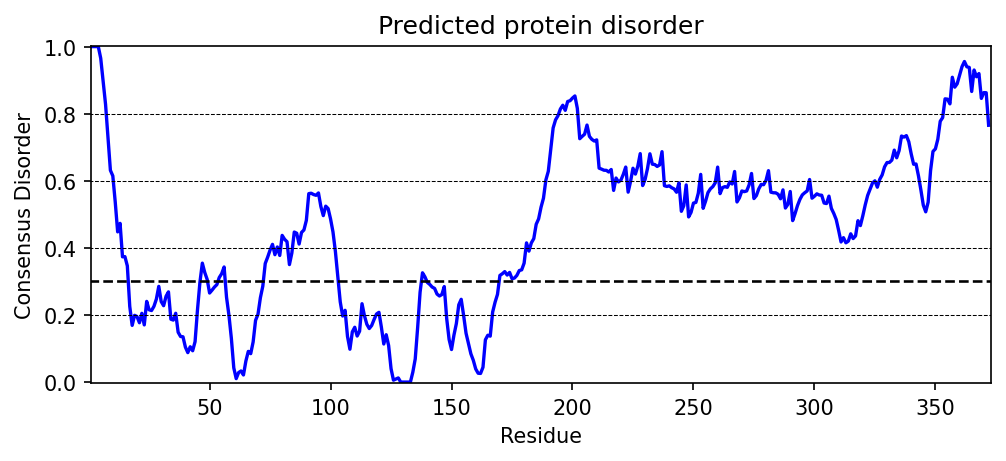

In [35]:
# graph disorder using previously defined hnRNPA1 sequence
meta.graph_disorder(hnRNPA1,legacy=True)

The graph_disorder() function has a few arguments that allows you to customize the graph. Here are a few examples:

### Adding the name of the protein to the title of the graph

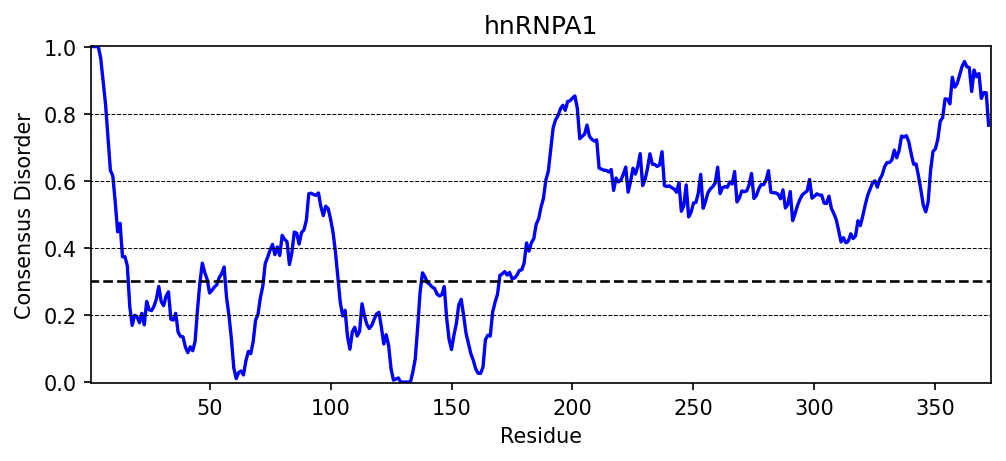

In [36]:
meta.graph_disorder(hnRNPA1, title="hnRNPA1",legacy=True)

### Shading regions of the graph

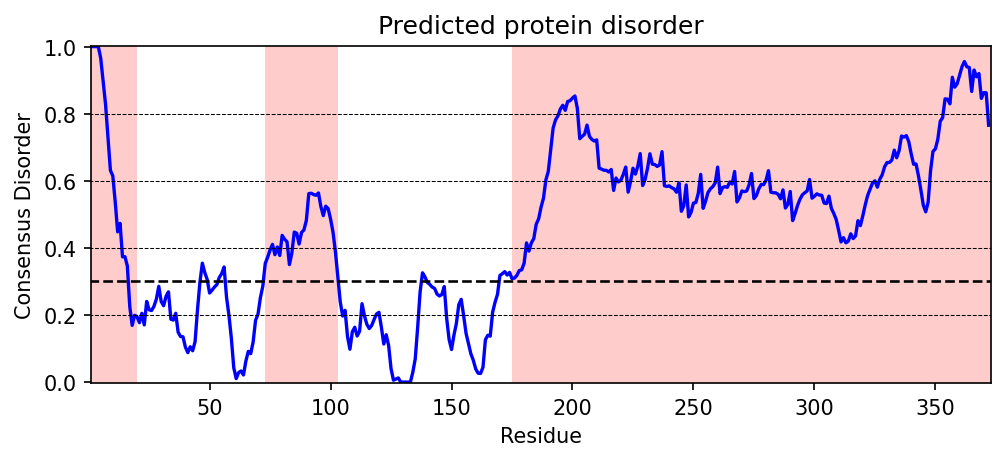

In [37]:
meta.graph_disorder(hnRNPA1, shaded_regions=[[1, 20],[73, 103], [175, 373]], legacy=LEGACY)

### Specifying color of the shaded regions of the graph

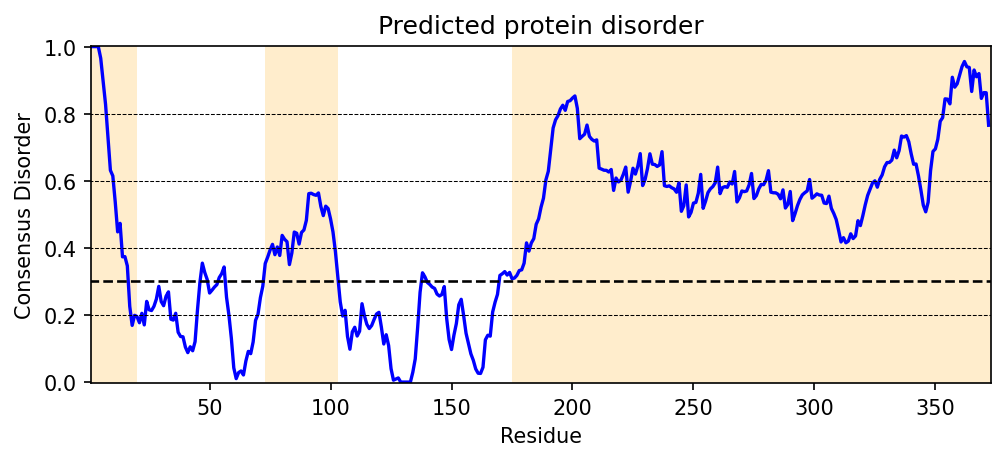

In [38]:
meta.graph_disorder(hnRNPA1, shaded_regions=[[1, 20],[73, 103], [175, 373]], shaded_region_color="orange",legacy=LEGACY)

In [39]:
### Specifying different colors of the shaded regions of the graph

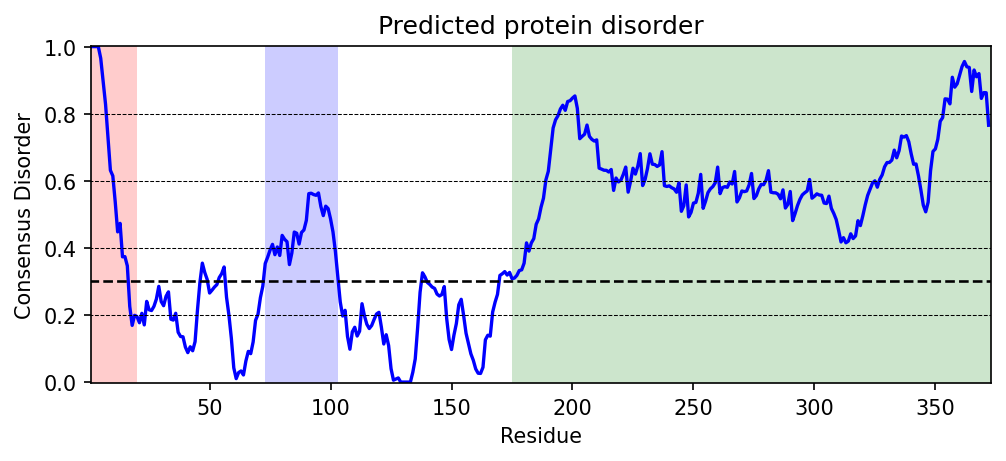

In [40]:
meta.graph_disorder(hnRNPA1, shaded_regions=[[1, 20],[73, 103], [175, 373]], shaded_region_color=['red','blue','green'], legacy=LEGACY)



### Saving the output graph

Metapredict also makes it easy for you to save graphs directly from Python. Simply set `output_file=` with the file path and the name.

In [41]:
meta.graph_disorder(hnRNPA1, output_file = "example_output_path/hnRNPA1_disorder.png", legacy=LEGACY)

### Specify the DPI of the output

You can also specify the DPI of the generated graph. The higher the DPI, the higher the resolution of the graph.

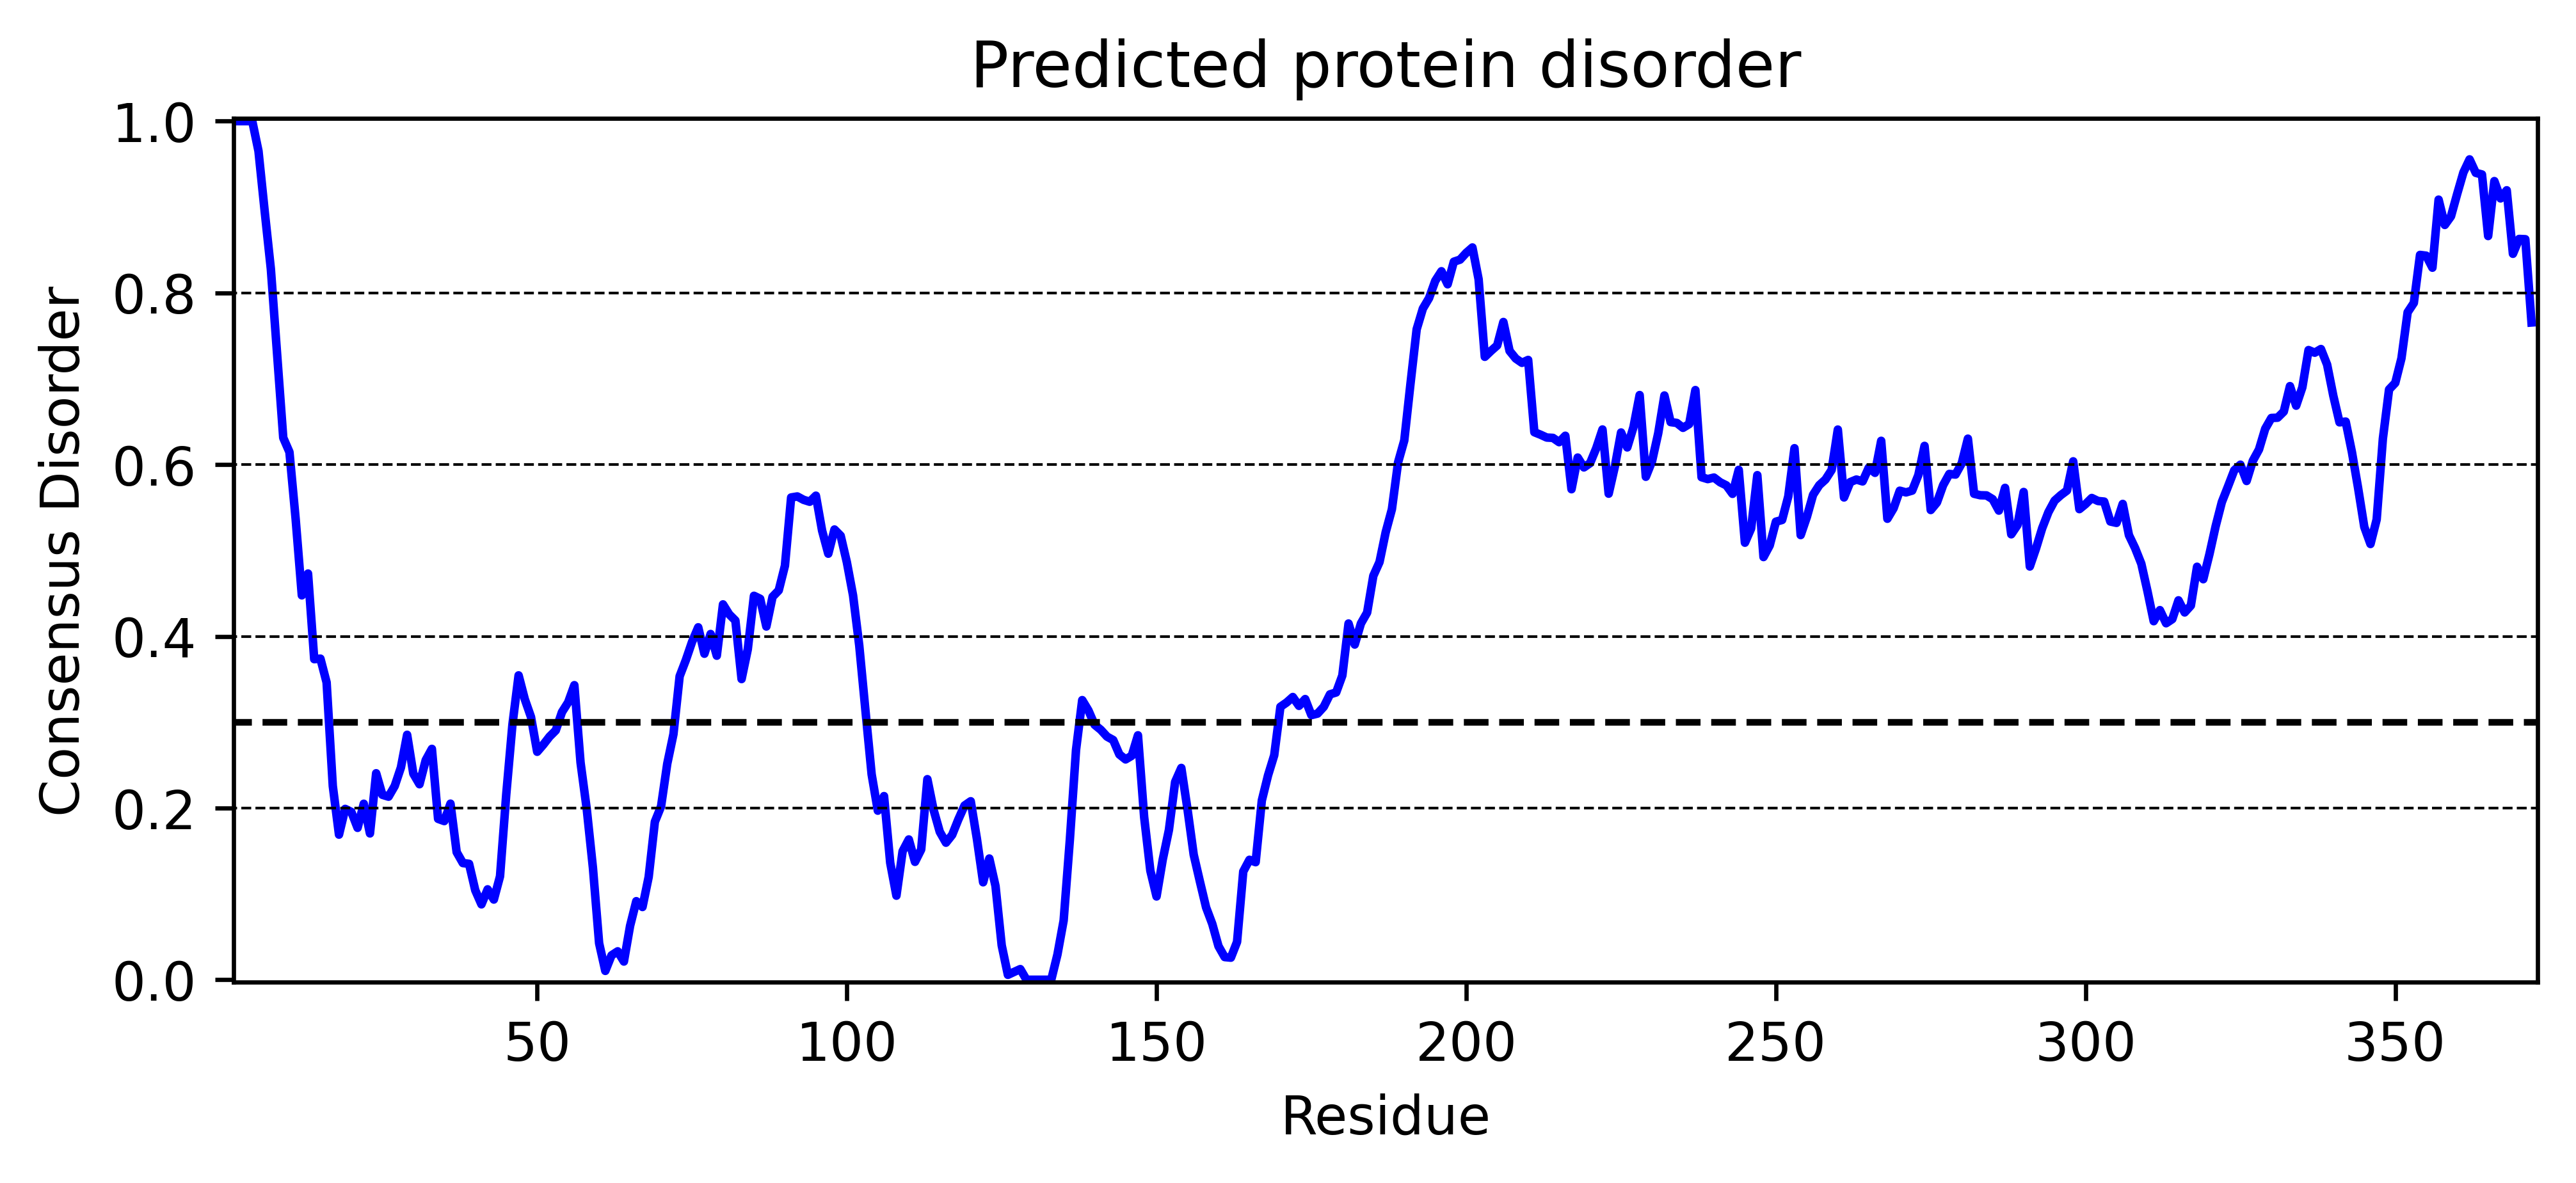

In [42]:
meta.graph_disorder(hnRNPA1, DPI=600, legacy=LEGACY)

### Change output filetype
You can also change the output filetype simply by changing the file extension - e.g. generate a PDF instead:


In [43]:
meta.graph_disorder(hnRNPA1, output_file = "example_output_path/hnRNPA1_disorder.pdf", legacy=LEGACY)

## Graph disorder from a .fasta file

Similar to being able to predict disorder from a FASTA file, you can also generate graphs from a FASTA file from Python. If no `output_file` is defined all the sequences in the FASTA file render in the notebook.

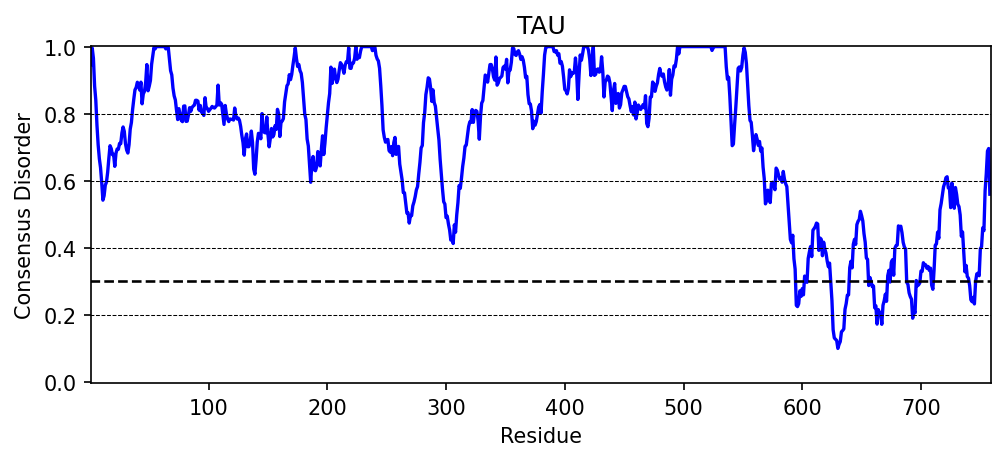

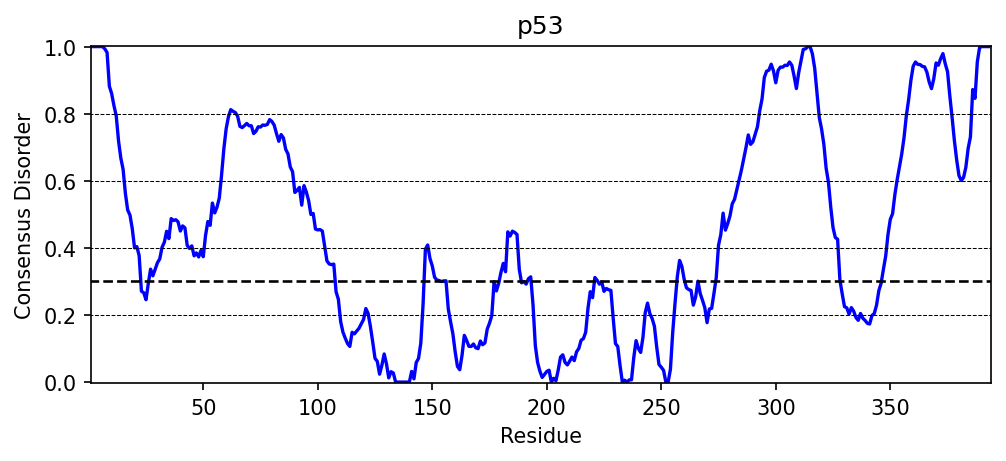

In [45]:
meta.graph_disorder_fasta('Tau_and_p53.fasta',legacy=LEGACY)

By default the `graph_disorder_fasta()` function will specify the title of the graph as the FASTA header. 

### Saving graphs generated from a FASTA file

metapredict makes it easy for you to generate a large number of graphs from any fasta file using the `graph_disorder_fasta()` function. By default, it will save the graphs to your current directory, but you can specify the output directory as well. Here are a few examples:

In [46]:
# save the output to a specific folder
output_path = "my_cool_graphs"
meta.graph_disorder_fasta("Tau_and_p53.fasta", output_dir=output_path, legacy=LEGACY)

By default the files names generated will be (up to) the first alpha-numeric characters in the FASTA header. 

### Avoiding overwriting in output files
You may have sequences that have almost identical fasta headers (or may be identical in the first 14 characters). To avoid these overwriting, the `meta.graph_disorder_fasta()` function comes with an `indexed_filenames=` parameter which, if set to `True`, means each output file generated contains a leading integer (starting at 1 and monotonically increasing) guarenteeing uniqueness.

In [47]:
output_path = "my_cool_graphs"
meta.graph_disorder_fasta("Tau_and_p53.fasta", output_dir=output_path, indexed_filenames=True, legacy=LEGACY)

### Generating graphs from a Uniprot ID

Similar to being able to predict disorder of a sequence using the Uniprot ID, you can also generate graphs using a Uniprot ID. 

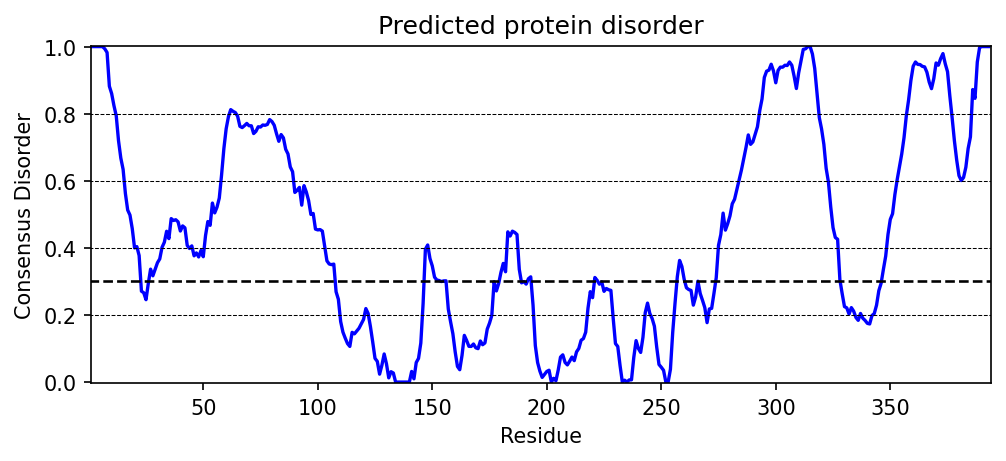

In [48]:
meta.graph_disorder_uniprot('P04637',legacy=LEGACY)

# For full documentation of metapredict, please see:

http://metapredict.readthedocs.io

# For access to the code for metapredict, please see:

https://github.com/idptools/metapredict

# For predicting disorder using our server please ee:

https://metapredict.net